## Exploratory Data Analysis (EDA)
Exploratory data analysis is one of the basic and essential steps of a data science project. A data scientist involves almost 70% of his work in doing the EDA of the dataset. It involves analyzing and investigating data sets and summarize their main characteristics.

### Why do EDA
  -  Model Building
  -  Analysis and Reporting
  -  Validate assumptions
  -  Handling missing values
  -  Feature engineering
  -  Detecting outliers

### Titanic Dataset EDA

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 1 - Identify Column Types

-  Numerical - PassengerId, Age, Fare
-  Categorical - Survived Pclass, Sex, Embarked, SipSp, Parch,
-  Mixed - Name, Ticket, Cabin

#### Step 2 - Univariate analysis

##### Univariate analysis - focuses on analysis each feature in the dataset independently.
-  Analyze the distribution to identify its shape (normal, left or right skewed), central tendency (mean, median, mode) and dispersion (Range, variance, standard deviation, Inter Quartile Range - IQR) 
-  Potential issues like outliers, skewness and missing values 

**Steps to do univariate analysis on Numerical columns:**

-  Descriptive statistics - mean, median, mode, std deviation, range, IQR
-  Plot graphs like histogram, boxplot
-  Identify Outliers and to decide whether to include or exclude them from the analysis
-  Skewness to consider transforming the data, if required
-  Conclusion - summarize the findings and make decision on how to proceed with further analysis

In [4]:
##### Age
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

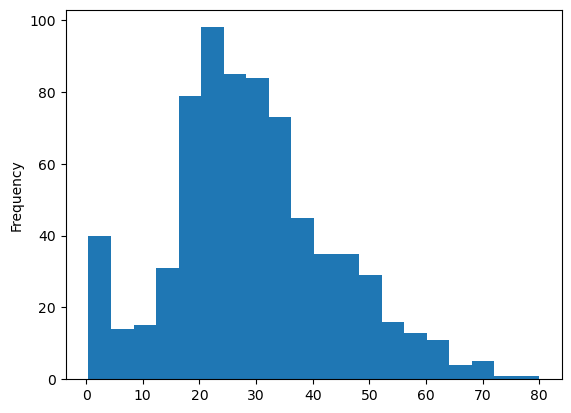

In [10]:
df['Age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

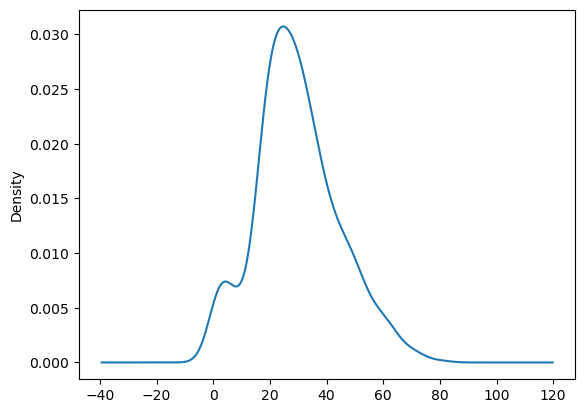

In [11]:
df['Age'].plot(kind='kde')

In [12]:
df['Age'].skew()

0.38910778230082704

<Axes: >

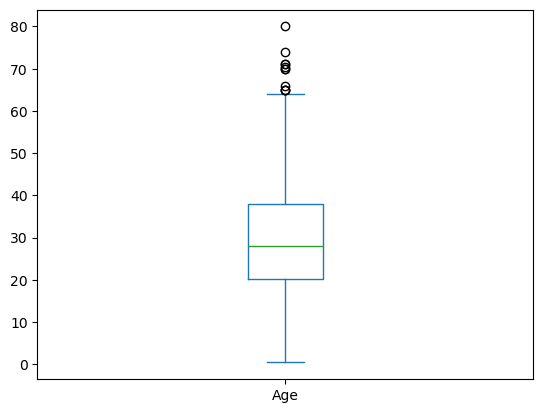

In [15]:
df['Age'].plot(kind='box')

In [17]:
# Missing values 
df['Age'].isnull().sum()
(df['Age'].isnull().sum()/len(df['Age']))*100

19.865319865319865

##### Age conclusions:
-  Almost Normally distributed
-  20% missing values
-  Some outliers

In [19]:
##### Fare 
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

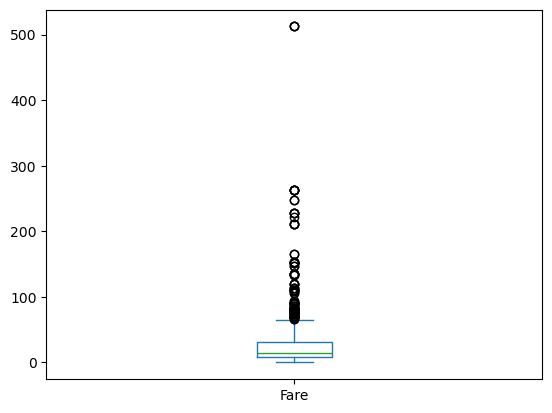

In [20]:
df['Fare'].plot(kind='box')

<Axes: ylabel='Density'>

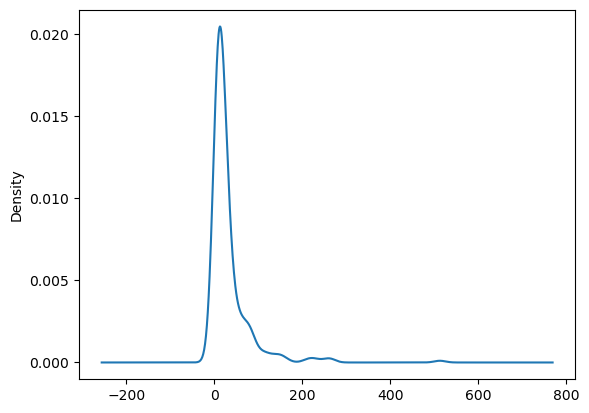

In [21]:
df['Fare'].plot(kind='kde')

In [22]:
df['Fare'].isnull().sum()

0

##### Fare conclusions:

-  Data is highly positively skewed
-  Fare column consist of group fare and not individual fare, will have to create a new column for individual fare

**Steps to do univariate analysis on Categorical columns:**

-  Same steps as Numerical columns but for Visualization of Categorical columns we use charts like pie chart and count plots

In [24]:
# We can do the same for all the categorical columns

df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

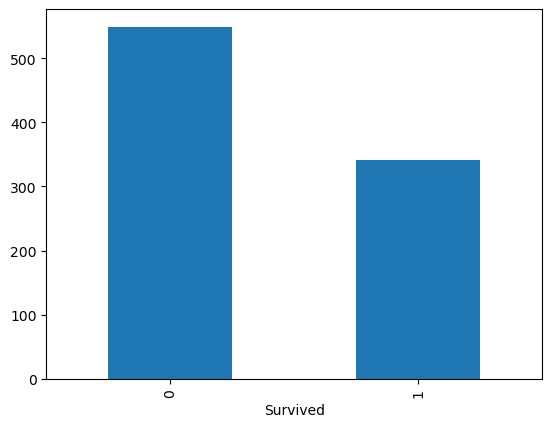

In [26]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

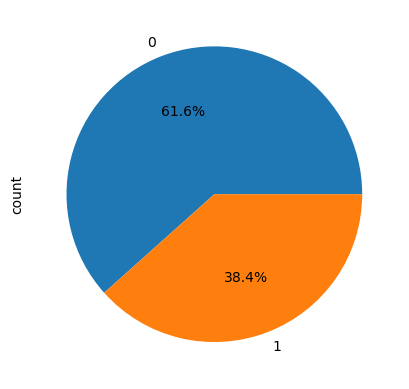

In [27]:
df['Survived'].value_counts().plot(kind='pie', autopct="%.1f%%")

###### Univariate analyais of Categorical column conclusion:

- SibSp and Parch can be combined into a new single column as Family Size
- IsAlone can be created as a new column

#### Step 3 - Bivariate Analysis 

Analyze relationship between 2 features/columns.

-  Numerical - Numerical - Visualize using scatterplot, 2D histplot, 2D KDEplots
-  Numerical - Categorical - Visualize using barplot, boxplot, kdeplot
-  Categorical - Categorical - Create crosstab or contingency tables to show the distribution of values in one categorical column grouped by the values in other categorical column. Visualize using heatmap, stacked barplots

As there could be many combinations of features to be analyzed, we usually pick up the most important features, mostly the Output feature and analyze its relationship with other features

In [31]:
#Categorical - Categorical 

#use normalize to show percentages, else count is showed
pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

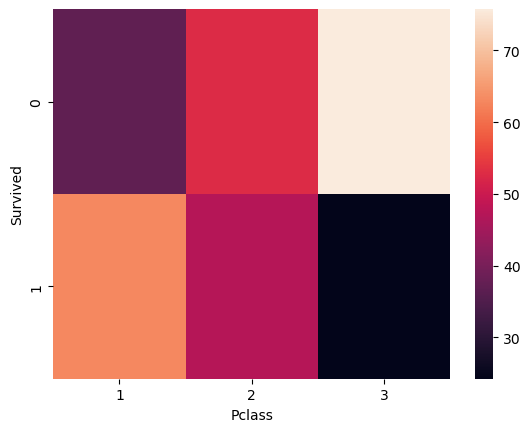

In [32]:
#Conclusion - The above shows 75% passengers from Pclass 3 died while 62% passengers from Pclass 1 survived, 
# we can put this in heatmap to visualize this 

sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100)

In [33]:
pd.crosstab(df['Survived'], df['Sex'], normalize="columns")*100

#Conclusion - Female survived more than male

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [35]:
pd.crosstab(df['Survived'], df['Embarked'], normalize='columns')*100

#Conclusion - passengers boarding from S and Q have lower probability to survive 
# if compared to passengers boarding from C

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [36]:
# Till now we have seen that either passengers in Pclass 1 or Female have higher chances to survive,
# so to validate the assumption we can use crosstab again

pd.crosstab(df['Sex'], df['Embarked'], normalize='columns')*100


Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [37]:
#Above shows no relationship, hence Sex has no relationship with Embarked feature

#Validating Pclass with Embarked

pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')*100

# Below shows Embarked from C has most passengers travelling in Pclass 1, so it could be a relationship
# Possible that rich people have boarded from station C (as Pclass has highest fare)


Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


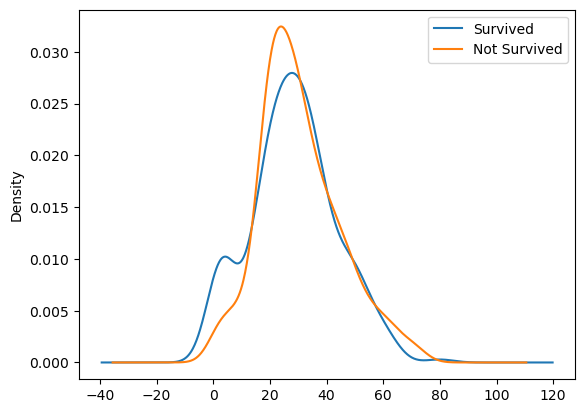

In [39]:
# Numerical - Categorical column, kde plot

df[df['Survived'] == 1]['Age'].plot(kind='kde', label= 'Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label= 'Not Survived')

plt.legend()
plt.show()

# Conclusion - infants and kids less than 5 years had higher probability to survive, 
# but young people had less chances of survival

In [40]:
# In the above graph we could see around 40 years of age, passengers survive more and 
# below code shows the mean age of Pclass = 1 passengers is 1, possibly these are the passengers
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

#### Feature Engineering

In [51]:
df_test = pd.read_csv('train.csv')

In [54]:
# combining test and train for analysis as few records were in test
pd.concat([df, df_test])
df.shape

(891, 12)

In [46]:
(df['SibSp'] + df['Parch'] + 1).value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [55]:
# Fare is for the whole family (sibsp, parch and one for the passenger), compute indivial fare
df['Individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [61]:
df[['Individual_fare', 'Fare']]

,Individual_fare,Fare
0,3.62500,7.2500
1,35.64165,71.2833
2,7.92500,7.9250
3,26.55000,53.1000
4,8.05000,8.0500
...,...,...
886,13.00000,13.0000
887,30.00000,30.0000
888,5.86250,23.4500
889,30.00000,30.0000


In [64]:
#Create a new feature named family size
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [66]:
def transform_family_size(size):

    if(size == 1):
        return 'alone'
    elif(size > 1 and size < 5):
        return 'small'
    else:
        return 'large'

In [71]:
# group family size into 3 buckets to perform bivariate analysis
df['Family_size'] = df['Family_size'].apply(transform_family_size)

In [72]:
pd.crosstab(df['Family_size'], df['Survived'], normalize='index')*100

Survived,0,1
Family_size,,
alone,69.646182,30.353818
large,83.870968,16.129032
small,42.123288,57.876712


In [73]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [79]:
# Extract title
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [80]:
df['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [81]:
df['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [88]:
#Replace less ocurring title with other
df['Title'] = df['Title'].str.replace('Dr.', 'Other')
df['Title'] = df['Title'].str.replace('Rev.', 'Other')
df['Title'] = df['Title'].str.replace('Mlle.', 'Other')
df['Title'] = df['Title'].str.replace('Major.', 'Other')
df['Title'] = df['Title'].str.replace('Col.', 'Other')
df['Title'] = df['Title'].str.replace('the', 'Other')
df['Title'] = df['Title'].str.replace('Capt.', 'Other')
df['Title'] = df['Title'].str.replace('Ms.', 'Other')
df['Title'] = df['Title'].str.replace('Sir.', 'Other')
df['Title'] = df['Title'].str.replace('Lady.', 'Other')
df['Title'] = df['Title'].str.replace('Mme.', 'Other')
df['Title'] = df['Title'].str.replace('Don.', 'Other')
df['Title'] = df['Title'].str.replace('Jonkheer.', 'Other')
df['Title'] = df['Title'].str.replace('OOtherr', 'Other')

In [89]:
df['Title'].value_counts()


Title
Mr.        517
Miss.      182
Mrs.       125
Master.     40
OOtherr     19
Other        8
Name: count, dtype: int64

In [91]:
pd.crosstab(df['Title'], df['Survived'], normalize='index')*100

Survived,0,1
Title,,
Master.,42.500000,57.500000
Miss.,30.219780,69.780220
Mr.,84.332689,15.667311
Mrs.,20.800000,79.200000
OOtherr,63.157895,36.842105
Other,37.500000,62.500000


In [93]:

df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Individual_fare      0
Family_size          0
Title                0
dtype: int64

In [94]:
# Fill missing value in numerical Age column with mean of Age
df['Age'].fillna(df['Age'].mean(), inplace= True)

C:\Users\nemaa0\AppData\Local\Temp\ipykernel_17920\1444409324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace= True)


In [98]:
# Fill missing values in categorical Embarked column with mode of Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

In [99]:
df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Individual_fare      0
Family_size          0
Title                0
dtype: int64

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,small,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,small,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,alone,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,small,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,alone,Mr.


In [115]:
# Handling Cabin column
df['Cabin'].fillna('Missing', inplace= True)


In [116]:
df['Cabin'].isnull().sum()

0

In [128]:
df['Cabin_category'] = df['Cabin'].str.get(0)


In [129]:
df['Cabin_category'].value_counts()

Cabin_category
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [131]:
pd.crosstab(df['Cabin_category'], df['Survived'], normalize='index')*100

Survived,0,1
Cabin_category,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
M,70.014556,29.985444
T,100.000000,0.000000


##### Encoding Categorical values



In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)


In [103]:
df.drop(['Sex', 'Embarked'], axis= 1, inplace=True)

In [106]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [104]:
df = pd.concat([df,sex,embarked], axis = 1)

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Individual_fare,Family_size,Title,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.62500,small,Mr.,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,35.64165,small,Mrs.,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,7.92500,alone,Miss.,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,26.55000,small,Mrs.,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,8.05000,alone,Mr.,True,False,True
